In [1]:
# Import Dependencies
import seaborn as sns
import pandas as pd
import re
import numpy as np

In [2]:
# Read csv into pandas dataframe
wine_ratings_df = pd.read_csv("winemag-data.csv").drop(["Unnamed: 0"], axis=1)
wine_ratings_df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [3]:
# Return number of rows and columns for raw dataframe.
wine_ratings_df.shape

(129971, 13)

In [4]:
# Print summary info for all columns in dataframe.
wine_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [5]:
# Create list of titles to prepare for year extraction.
titles_list = list(wine_ratings_df["title"].values)
titles_list

['Nicosia 2013 Vulkà Bianco  (Etna)',
 'Quinta dos Avidagos 2011 Avidagos Red (Douro)',
 'Rainstorm 2013 Pinot Gris (Willamette Valley)',
 'St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore)',
 "Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley)",
 'Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra)',
 'Terre di Giurfo 2013 Belsito Frappato (Vittoria)',
 'Trimbach 2012 Gewurztraminer (Alsace)',
 'Heinz Eifel 2013 Shine Gewürztraminer (Rheinhessen)',
 'Jean-Baptiste Adam 2012 Les Natures Pinot Gris (Alsace)',
 'Kirkland Signature 2011 Mountain Cuvée Cabernet Sauvignon (Napa Valley)',
 'Leon Beyer 2012 Gewurztraminer (Alsace)',
 'Louis M. Martini 2012 Cabernet Sauvignon (Alexander Valley)',
 'Masseria Setteporte 2012 Rosso  (Etna)',
 'Mirassou 2012 Chardonnay (Central Coast)',
 'Richard Böcking 2013 Devon Riesling (Mosel)',
 'Felix Lavaque 2010 Felix Malbec (Cafayate)',
 'Gaucho Andino 2011 Winemaker Selection Malbec (Mendoza)',
 'Prad

In [6]:
# loop through titles and store years from 21st century to list.
years = []
for i, title in enumerate(titles_list):
    try:
        year = re.search(r"\b(20)\d{2}\b", title).group(0)
        years.append(year)
    except:
        years.append(np.NaN)
print(years)

['2013', '2011', '2013', '2013', '2012', '2011', '2013', '2012', '2013', '2012', '2011', '2012', '2012', '2012', '2012', '2013', '2010', '2011', '2010', '2012', '2012', '2013', '2007', '2011', '2009', '2011', '2013', '2013', '2011', '2010', '2012', '2010', '2011', '2010', '2011', '2010', '2011', '2010', '2011', '2011', '2011', '2009', '2012', '2011', '2011', '2010', '2011', '2011', '2011', '2011', '2008', '2008', '2010', '2011', '2010', '2010', '2010', '2011', '2011', '2014', '2013', '2015', '2014', nan, '2015', '2015', '2015', '2013', '2014', nan, '2014', '2013', '2013', '2013', '2012', '2013', '2015', '2016', '2015', '2014', '2014', '2014', '2016', '2016', '2014', '2015', '2016', '2014', '2014', '2015', '2014', '2015', '2013', '2015', '2014', '2015', '2015', '2015', '2010', '2013', '2015', '2014', '2014', '2015', '2014', '2015', '2014', '2015', '2014', '2014', '2015', '2013', '2014', '2015', '2012', '2013', '2013', '2014', '2013', '2004', '2003', '2007', '2007', '2006', '2006', '2003

In [7]:
# Add extracted year column to dataframe.
wine_ratings_df["year"] = years
wine_ratings_df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


In [8]:
# Print summary info for all columns in revised dataframe.
wine_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  year                   123626 non-null  object 
dtypes: float64(1), int64(1), object(12)


In [9]:
# Print number of wines for each year, sorted from newer to older.
wine_ratings_df['year'].value_counts().sort_index(ascending=False)

2017       11
2016     3691
2015    10052
2014    15582
2013    15875
2012    15747
2011    12558
2010    12167
2009     9878
2008     7439
2007     7053
2006     5772
2005     3613
2004     1774
2003      598
2002      366
2001      691
2000      759
Name: year, dtype: int64

In [10]:
# check stats for year column.
wine_ratings_df['year'].describe()

count     123626
unique        18
top         2013
freq       15875
Name: year, dtype: object

In [11]:
# create new dataframe with only the columns we want to keep.
selected_columns = ['country', 'designation', 'points', 'price', 'province',
       'region_1', 'taster_name', 'title', 'variety', 'winery', 'year']
wine_ratings_df = wine_ratings_df[selected_columns]

In [12]:
# Create function to display info for null values in dataframe.
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [13]:
missing_values_table(wine_ratings_df)

Your selected dataframe has 11 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
designation,37465,28.8
taster_name,26244,20.2
region_1,21247,16.3
price,8996,6.9
year,6345,4.9
country,63,0.0
province,63,0.0
variety,1,0.0


In [14]:
# Drop all rows with null values and renumber index.
wine_ratings_df = wine_ratings_df.dropna().reset_index(drop=True)
wine_ratings_df

,country,designation,points,price,province,region_1,taster_name,title,variety,winery,year
0,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
1,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
2,Spain,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
3,Italy,Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013
4,France,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012
...,...,...,...,...,...,...,...,...,...,...,...
51090,France,Brand Grand Cru,90,57.0,Alsace,Alsace,Roger Voss,Cave de Turckheim 2010 Brand Grand Cru Pinot G...,Pinot Gris,Cave de Turckheim,2010
51091,Italy,Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,Kerin O’Keefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano,2012
51092,France,Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,Roger Voss,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,2013
51093,France,Kritt,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013


In [15]:
# Print counts of wines by country. 
wine_ratings_df['country'].value_counts()

US           25205
France       10179
Italy         6709
Spain         4677
Argentina     2781
Australia     1378
Canada         166
Name: country, dtype: int64

In [16]:
# Print ratings by number of times they appear in dataset and sort from highest to lowest. 
wine_ratings_df['points'].value_counts().sort_index(ascending=False)

100       6
99       11
98       31
97       75
96      224
95      717
94     1939
93     3365
92     4678
91     5512
90     6599
89     5277
88     6817
87     5737
86     4010
85     2819
84     1702
83      851
82      439
81      168
80      118
Name: points, dtype: int64

In [17]:
# Check simple stats for dataset.
wine_ratings_df.describe()

,points,price
count,51095.000000,51095.000000
mean,89.020452,39.256229
std,2.950956,35.897358
min,80.000000,4.000000
25%,87.000000,20.000000
50%,89.000000,30.000000
75%,91.000000,48.000000
max,100.000000,2013.000000


In [18]:
# Print top 25 provinces that show up most often in dataset.
wine_ratings_df['province'].value_counts().head(25)

California            13648
Washington             5746
Oregon                 3646
Northern Spain         2978
Mendoza Province       2388
Burgundy               2080
Tuscany                1967
New York               1715
Piedmont               1615
Alsace                 1531
Loire Valley           1229
Bordeaux               1108
Southwest France       1053
South Australia         909
Provence                806
Catalonia               720
Sicily & Sardinia       687
Rhône Valley            684
Northeastern Italy      654
Beaujolais              588
Veneto                  586
Central Italy           430
Southern Italy          417
Other                   393
Champagne               386
Name: province, dtype: int64

In [19]:
# Print counts of wines by grape variety that show up more than 300 times in dataset. 
wine_ratings_df['variety'].value_counts()[wine_ratings_df['variety'].value_counts()> 300]

Pinot Noir                  6547
Chardonnay                  4679
Red Blend                   4637
Cabernet Sauvignon          3089
Bordeaux-style Red Blend    2214
Syrah                       1975
Riesling                    1841
Rosé                        1768
Malbec                      1765
Sauvignon Blanc             1390
Nebbiolo                    1387
Tempranillo                 1371
Zinfandel                   1115
White Blend                 1101
Rhône-style Red Blend        983
Sangiovese                   943
Merlot                       855
Pinot Gris                   648
Cabernet Franc               616
Gamay                        586
Sparkling Blend              581
Gewürztraminer               548
Tempranillo Blend            544
Shiraz                       421
Viognier                     388
Grenache                     374
Champagne Blend              315
Name: variety, dtype: int64

In [20]:
# Print counts of wines by year produced.
wine_ratings_df['year'].value_counts()

2013    8798
2014    8319
2012    8153
2011    5053
2015    4766
2010    4297
2009    3047
2008    2143
2016    1714
2007    1609
2006    1293
2005     921
2004     429
2000     146
2003     142
2001     131
2002     128
2017       6
Name: year, dtype: int64

In [21]:
# Print numbers of wines the tasters tested.
wine_ratings_df['taster_name'].value_counts()

Roger Voss            8041
Michael Schachner     7488
Virginie Boone        6641
Kerin O’Keefe         6620
Paul Gregutt          6175
Matt Kettmann         4477
Sean P. Sullivan      3363
Jim Gordon            2527
Joe Czerwinski        2181
Anna Lee C. Iijima    1656
Anne Krebiehl MW      1023
Lauren Buzzeo          412
Alexander Peartree     241
Susan Kostrzewa        150
Carrie Dykes            91
Fiona Adams              8
Christina Pickard        1
Name: taster_name, dtype: int64

In [22]:
# Show mean of rating and price broken down by country.
wine_ratings_df.groupby(['country']).mean()

,points,price
country,,
Argentina,87.169004,26.973750
Australia,89.244557,42.441219
Canada,89.439759,39.783133
France,89.124963,38.585421
Italy,89.139961,46.113281
Spain,87.542869,31.243105
US,89.409879,40.366435


In [23]:
# Show top 10 grape varieties.
wine_ratings_df['variety'].value_counts().nlargest(10)

Pinot Noir                  6547
Chardonnay                  4679
Red Blend                   4637
Cabernet Sauvignon          3089
Bordeaux-style Red Blend    2214
Syrah                       1975
Riesling                    1841
Rosé                        1768
Malbec                      1765
Sauvignon Blanc             1390
Name: variety, dtype: int64

In [24]:
# Show top 20 grape varieties by highest average rating, along with average price. 
variety_ratings = wine_ratings_df.groupby(['variety']).mean()
variety_ratings.sort_values('points', ascending=False).head(20)

,points,price
variety,,
Cabernet-Shiraz,96.000000,150.000000
White Riesling,96.000000,40.000000
Tinta del Pais,95.000000,47.500000
Syrah-Petit Verdot,94.000000,49.000000
Riesling-Chardonnay,94.000000,40.000000
Picolit,93.000000,45.000000
Garnacha-Cariñena,93.000000,57.000000
Roviello,93.000000,28.000000
Champagne Blend,92.193651,102.393651


In [25]:
# Show top 20 growing provinces by highest average rating, along with average price.
best_prov_ratings = wine_ratings_df.groupby(['province']).mean()
best_prov_ratings.sort_values('points', ascending=False).head(20)

,points,price
province,,
Champagne,92.505181,112.567358
Alsace,90.256695,33.296538
Piedmont,90.152322,64.100310
Tasmania,90.117647,50.294118
Burgundy,90.079327,64.584135
California,89.793083,44.435082
British Columbia,89.784946,35.666667
South Australia,89.679868,46.759076
Oregon,89.583928,42.124794


In [26]:
# Show bottom 20 growing provinces by lowest average rating, along with average price.
worst_prov_ratings = wine_ratings_df.groupby(['province']).mean()
worst_prov_ratings.sort_values('points', ascending=True).head(20)

,points,price
province,,
Missouri,82.000000,15.000000
New Jersey,82.750000,24.750000
Kentucky,83.000000,35.000000
New Mexico,83.250000,27.916667
Ohio,83.285714,13.857143
Arizona,83.600000,24.800000
Connecticut,84.000000,15.500000
North Carolina,84.333333,20.444444
Vermont,84.333333,31.666667


In [27]:
# Check data types.
wine_ratings_df.dtypes

country         object
designation     object
points           int64
price          float64
province        object
region_1        object
taster_name     object
title           object
variety         object
winery          object
year            object
dtype: object

In [28]:
# Convert year data type to integer.
wine_ratings_df["year"] = wine_ratings_df["year"].astype(int)
wine_ratings_df.head()

,country,designation,points,price,province,region_1,taster_name,title,variety,winery,year
0,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
1,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
2,Spain,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
3,Italy,Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013
4,France,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012


In [29]:
# Double check data types again.
wine_ratings_df.dtypes

country         object
designation     object
points           int64
price          float64
province        object
region_1        object
taster_name     object
title           object
variety         object
winery          object
year             int32
dtype: object

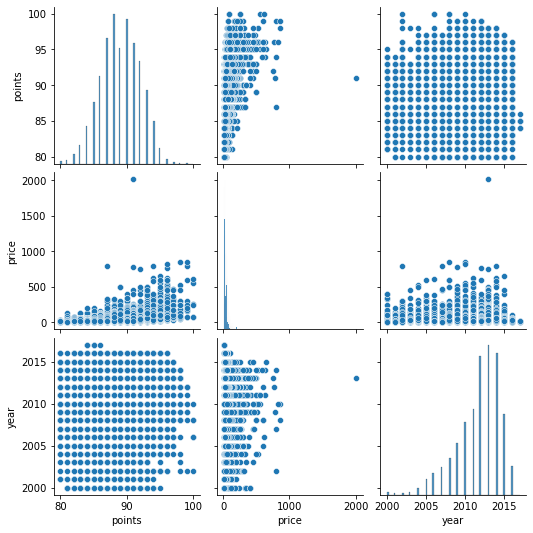

In [30]:
# Create pairplot to visualize relationships between price, points, and year features.
sns.pairplot(wine_ratings_df)

<AxesSubplot:xlabel='points', ylabel='country'>

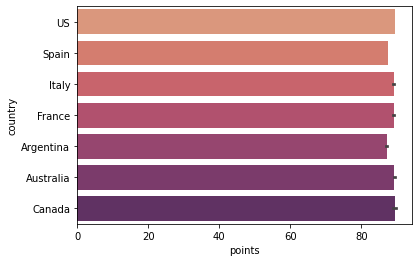

In [31]:
# Create bar plot of wine ratings by country.
sns.barplot(x='points', y='country', data=wine_ratings_df, palette='flare')